#### Assignment 1 – Using NLTK and Vader
Sentiment Analysis
In this assignment you will be using NLTK, PyPDF2, py-readability-metrics and wordcloud to compare two
news stories on the same topic, from two different sources. Complete your analysis and commentary in
a Jupyter notebook. The notebook should be pushed to your personal Github class repository and a URL
to the notebook submitted for the assignment of Canvas

1. Install PyPDF2 and py-readability-metrics
2. In a new notebook, import nltk and run the following commands:
a. nltk.download(‘punkt’)
b. nltk.download(‘stopwords’)
c. nltk.download(‘vader_lexicon’)
3. Read the two news stories found in this assignment on Canvas. In a markdown cell in your
notebook, briefly characterize the issue at hand and your impressions from a news reporting
objectivity perspective.
4. Use PyPDF2 to extract the text out of each document
a. Display the text
b. Briefly note any anomalies in your notebook
5. Use NLTK to complete sentiment analysis for each of the articles
a. Compare the results from the two articles
b. Compare the results to your reading of the articles; do you agree with the outcome?
6. Run sentiment analysis on the article headlines
a. Do those results agree with the overall sentiment?
7. Using py-readability-metrics complete 2-3 different readability scores
a. Discuss what the chosen metric is measuring
b. Compare the scores from both articles
8. Using wordcloud, create word clouds for both articles
a. Briefly comment on the word clouds


    

In [11]:
import nltk
!pip install PyPDF2 
!pip install py-readability-metrics
!pip install wordcloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariajosezuniga/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariajosezuniga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mariajosezuniga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

I read both articles and what caught my attention was the difference in the tone.

Fox sounds much more dramatic. They emphizise the plagiarism almost like a major scandal, highlighting how 40 new allegations put Harvard in the spotlight. I think they're trying to amplify the mistake.

On the other hand, Reuters keeps it calm, focusing on the correction process. It reads more like "she made the citation mistakes and is fixing them."

In [40]:
from pathlib import Path
import PyPDF2 

file1 = Path("foxnews_article.pdf")
file2 = Path("reuters_article.pdf")

In [42]:
def extract_text(pdf_path):
    text_parts = [] # empty list to hold text from all pages
    with open(pdf_path, "rb") as f: # open the pdf file in binary mode (rb = read binary)
        reader = PyPDF2.PdfReader(f) # create a PDF reader object
        for i, page in enumerate(reader.pages): # loop through all pages in the file
            try:
                t = page.extract_text() or "" # extract text from the page, or empty string if nothing
            except Exception as e:
                t = "" # if an error happens, skip page
            text_parts.append(t) # add the page text to the list
    return "\n".join(text_parts).strip() # join all pages together into one big string

# run the function on both files
text1 = extract_text(file1)
text2 = extract_text(file2)

In [53]:
# preview Fox article
print("FOX length:", len(text1))
text1

FOX length: 5330


'1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit\nwith more plagiarism charges\nfoxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges\nMedia\nHarvard ‘received a complaint outlining over 40 allegations of\nplagiarism,’ according to the Free Beacon\n By Brian Flood  Fox News\nPublished December 20, 2023 12:59pm EST\nHarvard president facing 40 new allegations of plagiarism\nFox News\' Molly Line reports the latest on the allegations. \nEmbattled Harvard University President Claudine Gay  has been slapped with additional\ncharges of plagiarism. \nThe Washington Free Beacon  reported Harvard "received a complaint outlining over 40\nallegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard\'s\nresearch integrity of ficer, Stacey Springs, outlining the claims. \n"The document paints a picture of a pattern of misconduct more extensive than has been\npreviously reported and puts the Harvard Cor

In [55]:
print("REUTERS length:", len(text2))
text2

REUTERS length: 3618


'1 / 3Gabriella BorterHarvard president will submit dissertation edits after\nplagiarism allegations\nreuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21\nHarvard University President Claudine Gay testifies before a House Education and The\nWorkforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting\nAntisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken\nCedeno/File Photo Acquire Licensing Rights\nDec 21 (Reuters) - Harvard University\'s president was planning to submit three corrections to\nher 1997 dissertation after a committee investigating plagiarism allegations against her found\nthat she had made citation errors, a university spokesperson said.\nClaudine Gay , who was inaugurated as Harvard\'s president in September , has already\nsubmitted corrections to two published articles in recent weeks that were the focus of a\nreview by the Harvard Corporation, the university\

Each article contain advertisement or links to other articles in the middle.
Each articles has several pages


### Sentiment Analysis

In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

fox_scores = sia.polarity_scores(text1)
reuters_scores = sia.polarity_scores(text2)

print("FOX:", fox_scores)
print("REUTERS:", reuters_scores)


FOX: {'neg': 0.064, 'neu': 0.863, 'pos': 0.073, 'compound': 0.8346}
REUTERS: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


This last analysis shows FOX article as more positive and the REUTERS one as more negative.
However, this doesn’t match my previous analysis. Probably, the difference comes from how the last analysis interprets certain words without context (like support, leadership, etc)

In [76]:
# analyzing each article's headlines
headline1 = text1.split("\n")[0]
headline2 = text2.split("\n")[0]

print("FOX:", headline1)
print("REUTERS:", headline2)


FOX: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
REUTERS: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after


In [78]:
# sentiment analysis for headlines
print("FOX:", sia.polarity_scores(headline1))
print("REUTERS:", sia.polarity_scores(headline2))


FOX: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
REUTERS: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


FOX article headline has a more negative compound score because it uses words like “embattled” and “hit with charges.”  
REUTERS headline is neutral. 

This result is aligned with the analysis I mentioned at the beginning.

### Readability (what it is and why I used these metrics)

“Readability” is a Python library that includes several formulas to check how easy or hard it is to read a text.
Since these two articles are about a political and academic topic, I decided to use two metrics that make sense here:

- Flesch Reading Ease: measures how smooth or simple a text feels (shorter sentences and words → higher score).
Range goes from 0 to 100, where higher values mean the text is easier to read (90–100 = very easy, 50–60 = average, 0–30 = very difficult)
- Gunning Fog: measures how dense or complex the writing is (longer sentences and words → higher score).
Range goes from 6 to 20, where higher scores mean the text is more complex (6–8 = easy, 9–12 = standard, 13–16 = college level, 17+ = very dense or academic).  


In [100]:
# Readability: compare FOX vs REUTERS using Flesch Reading Ease and Gunning Fog
from readability import Readability

# Create readability objects for both articles
r1 = Readability(text1)   # FOX
r2 = Readability(text2)   # REUTERS

# Flesch Reading Ease → 0–100 (higher = easier to read)
flesch1 = r1.flesch()
flesch2 = r2.flesch()

# Gunning Fog → years of education needed (higher = harder to read)
fog1 = r1.gunning_fog()
fog2 = r2.gunning_fog()

# Convert to float in case the library returns text instead of numbers
fox_fre  = float(flesch1.score)
fox_fog  = float(fog1.score)
reut_fre = float(flesch2.score)
reut_fog = float(fog2.score)

# Print simple comparison lines
print("FOX     → Flesch Reading Ease:", round(fox_fre, 2), "| Gunning Fog:", round(fox_fog, 2))
print("REUTERS → Flesch Reading Ease:", round(reut_fre, 2), "| Gunning Fog:", round(reut_fog, 2))


FOX     → Flesch Reading Ease: 21.41 | Gunning Fog: 21.87
REUTERS → Flesch Reading Ease: 18.38 | Gunning Fog: 18.87


Readability  interpretations

- **FOX:** Flesch Reading Ease = 21.41 (Difficult to read)| Gunning Fog = 21.87 (Dense or academic)
- **REUTERS:** Flesch Reading Ease = 18.38 Difficult to read) | Gunning Fog = 18.87 (Dense or academic)

Both articles are complex to read, which makes sense because they’re about an academic and political topic.  
Still, FOX article shows a slightly higher Flesch score, meaning it’s a bit easier to read and possibly written in a more direct, accessible way. 

The Gunning Fog results are close but follow the same pattern: FOX is a bit lighter, while Reuters reads as more structured and academic.  


### Wordcloud

In [107]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### Fox article

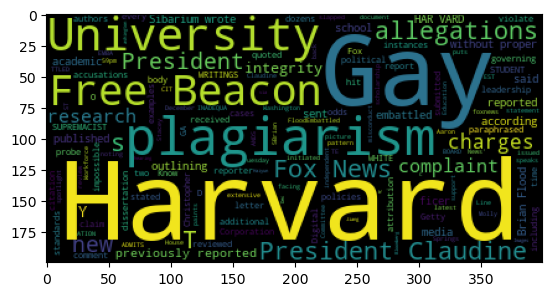

In [109]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text1)
plt.imshow(cloud)

### Reuters article

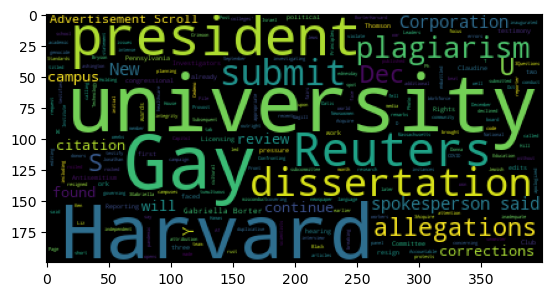

In [111]:
cloud = WordCloud(stopwords=STOPWORDS).generate(text2)
plt.imshow(cloud)

Wordcloud interpretation:
Both articles highlight similar (and more obvious) words like Harvard, Gay, university.

However, FOX article mention the word plagiarism more often than Reuters. They also mention "Free Beacon", more times which is the source that reported the allegation.

The REUTERS cloud includes terms like dissertation and submit, which are more related to the fact that their article focuses on how Gay is submitting specific corrections after the allegations
